Import necessary libraries

In [1]:
import sqlite3  
from datetime import datetime  
from tabulate import tabulate  
import matplotlib.pyplot as plt
import numpy as np

Establish a connection to an in-memory SQLite database

In [2]:
conn = sqlite3.connect(':memory:')  
cursor = conn.cursor() 

Create tables in the database

In [3]:
cursor.executescript("""
-- Customers table: Stores customer information
CREATE TABLE Customers (
    customer_id TEXT PRIMARY KEY,  -- Unique identifier for the customer
    name TEXT,  -- Customer's name
    email TEXT UNIQUE,  -- Customer's email (must be unique)
    phone TEXT UNIQUE,  -- Customer's phone number (must be unique)
    wallet_balance DECIMAL,  -- Customer's wallet balance
    created_at DATETIME,  -- Timestamp when the customer was created
    updated_at DATETIME  -- Timestamp when the customer was last updated
);

-- Vendors table: Stores vendor information
CREATE TABLE Vendors (
    vendor_id TEXT PRIMARY KEY,  -- Unique identifier for the vendor
    name TEXT,  -- Vendor's name
    category TEXT CHECK(category IN ('small', 'medium', 'large')),  -- Vendor's category
    location TEXT,  -- Vendor's location
    created_at DATETIME,  -- Timestamp when the vendor was created
    updated_at DATETIME  -- Timestamp when the vendor was last updated
);

-- Transactions table: Stores transaction details
CREATE TABLE Transactions (
    transaction_id TEXT PRIMARY KEY,  -- Unique identifier for the transaction
    customer_id TEXT,  -- Foreign key referencing the customer
    vendor_id TEXT,  -- Foreign key referencing the vendor
    amount DECIMAL,  -- Transaction amount
    reward_points DECIMAL,  -- Reward points earned in the transaction
    timestamp DATETIME,  -- Timestamp of the transaction
    FOREIGN KEY (customer_id) REFERENCES Customers(customer_id),  -- Link to Customers table
    FOREIGN KEY (vendor_id) REFERENCES Vendors(vendor_id)  -- Link to Vendors table
);

-- RewardPolicies table: Stores reward policies for different vendor categories
CREATE TABLE RewardPolicies (
    policy_id TEXT PRIMARY KEY,  -- Unique identifier for the policy
    category TEXT CHECK(category IN ('small', 'medium', 'large')),  -- Vendor category
    threshold DECIMAL,  -- Minimum transaction amount to earn rewards
    reward_percentage DECIMAL,  -- Percentage of the transaction amount awarded as reward points
    redeemable_percentage DECIMAL  -- Percentage of reward points that can be redeemed
);

-- Analytics table: Stores analytics data for vendors
CREATE TABLE Analytics (
    analytics_id TEXT PRIMARY KEY,  -- Unique identifier for the analytics record
    vendor_id TEXT,  -- Foreign key referencing the vendor
    popular_product TEXT,  -- Most popular product for the vendor
    total_transactions INTEGER,  -- Total number of transactions for the vendor
    total_revenue DECIMAL,  -- Total revenue generated by the vendor
    updated_at DATETIME,  -- Timestamp when the analytics were last updated
    FOREIGN KEY (vendor_id) REFERENCES Vendors(vendor_id)  -- Link to Vendors table
);

-- RewardAllocations table: Stores reward points allocated to customers
CREATE TABLE RewardAllocations (
    allocation_id TEXT PRIMARY KEY,  -- Unique identifier for the reward allocation
    customer_id TEXT,  -- Foreign key referencing the customer
    transaction_id TEXT,  -- Foreign key referencing the transaction
    reward_points DECIMAL,  -- Reward points allocated
    redeemed_points DECIMAL,  -- Reward points redeemed
    timestamp DATETIME,  -- Timestamp of the reward allocation
    FOREIGN KEY (customer_id) REFERENCES Customers(customer_id),  -- Link to Customers table
    FOREIGN KEY (transaction_id) REFERENCES Transactions(transaction_id)  -- Link to Transactions table
);

-- Products table: Stores product details
CREATE TABLE Products (
    product_id TEXT PRIMARY KEY,  -- Unique identifier for the product
    product_name TEXT,  -- Name of the product
    customer_id TEXT,  -- Foreign key referencing the customer who purchased the product
    vendor_id TEXT,  -- Foreign key referencing the vendor selling the product
    transaction_id TEXT,  -- Foreign key referencing the transaction
    price DECIMAL,  -- Price of the product
    timestamp DATETIME,  -- Timestamp of the product purchase
    location TEXT,  -- Location where the product was purchased
    frequency_of_buying INTEGER,  -- Frequency of buying the product
    FOREIGN KEY (customer_id) REFERENCES Customers(customer_id),  -- Link to Customers table
    FOREIGN KEY (vendor_id) REFERENCES Vendors(vendor_id),  -- Link to Vendors table
    FOREIGN KEY (transaction_id) REFERENCES Transactions(transaction_id)  -- Link to Transactions table
);
""")

In [4]:
now = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

Insert Sample Data into the Tables

In [5]:
# Insert sample data into the Customers table
cursor.executemany("""
INSERT INTO Customers (customer_id, name, email, phone, wallet_balance, created_at, updated_at)
VALUES (?, ?, ?, ?, ?, ?, ?);
""", [
    ("C001", "Alice", "alice@example.com", "1234567890", 50.0, now, now),
    ("C002", "Bob", "bob@example.com", "0987654321", 20.0, now, now),
    ("C003", "Charlie", "charlie@example.com", "1122334455", 100.0, now, now),
    ("C004", "David", "david@example.com", "2233445566", 150.0, now, now),
    ("C005", "Eve", "eve@example.com", "3344556677", 75.0, now, now)
])

In [6]:
# Insert sample data into the Vendors table
cursor.executemany("""
INSERT INTO Vendors (vendor_id, name, category, location, created_at, updated_at)
VALUES (?, ?, ?, ?, ?, ?);
""", [
    ("V001", "Vendor A", "small", "Location A", now, now),
    ("V002", "Vendor B", "medium", "Location B", now, now),
    ("V003", "Vendor C", "large", "Location C", now, now),
    ("V004", "Vendor D", "small", "Location D", now, now),
    ("V005", "Vendor E", "medium", "Location E", now, now)
])

In [7]:
# Insert sample data into the Transactions table
cursor.executemany("""
INSERT INTO Transactions (transaction_id, customer_id, vendor_id, amount, reward_points, timestamp)
VALUES (?, ?, ?, ?, ?, ?);
""", [
    ("T001", "C001", "V001", 100.0, 10.0, now),
    ("T002", "C002", "V002", 200.0, 20.0, now),
    ("T003", "C003", "V003", 150.0, 15.0, now),
    ("T004", "C004", "V004", 250.0, 25.0, now),
    ("T005", "C005", "V005", 300.0, 30.0, now)
])

In [8]:
# Insert sample data into the RewardPolicies table
cursor.executemany("""
INSERT INTO RewardPolicies (policy_id, category, threshold, reward_percentage, redeemable_percentage)
VALUES (?, ?, ?, ?, ?);
""", [
    ("P001", "small", 50.0, 0.1, 0.8),
    ("P002", "medium", 100.0, 0.15, 0.7),
    ("P003", "large", 150.0, 0.2, 0.75),
    ("P004", "small", 60.0, 0.12, 0.85),
    ("P005", "medium", 120.0, 0.18, 0.65)
])

In [9]:
# Insert sample data into the Analytics table
cursor.executemany("""
INSERT INTO Analytics (analytics_id, vendor_id, popular_product, total_transactions, total_revenue, updated_at)
VALUES (?, ?, ?, ?, ?, ?);
""", [
    ("A001", "V001", "Product A", 3, 550.0, now),
    ("A002", "V002", "Product B", 2, 450.0, now),
    ("A003", "V003", "Product C", 4, 600.0, now),
    ("A004", "V004", "Product D", 1, 250.0, now),
    ("A005", "V005", "Product E", 5, 750.0, now)
])

In [10]:
# Insert sample data into the RewardAllocations table
cursor.executemany("""
INSERT INTO RewardAllocations (allocation_id, customer_id, transaction_id, reward_points, redeemed_points, timestamp)
VALUES (?, ?, ?, ?, ?, ?);
""", [
    ("RA001", "C001", "T001", 10.0, 0.0, now),
    ("RA002", "C002", "T002", 20.0, 5.0, now),
    ("RA003", "C003", "T003", 15.0, 0.0, now),
    ("RA004", "C004", "T004", 25.0, 10.0, now),
    ("RA005", "C005", "T005", 30.0, 10.0, now)
])

In [11]:
# Insert sample data into the Products table
cursor.executemany("""
INSERT INTO Products (product_id, product_name, customer_id, vendor_id, transaction_id, price, timestamp, location, frequency_of_buying)
VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?);
""", [
    ("P001", "Product A", "C001", "V001", "T001", 25.0, now, "Location A", 5),
    ("P002", "Product B", "C002", "V002", "T002", 30.0, now, "Location B", 3),
    ("P003", "Product C", "C003", "V003", "T003", 20.0, now, "Location C", 2),
    ("P004", "Product D", "C004", "V004", "T004", 35.0, now, "Location D", 6),
    ("P005", "Product E", "C005", "V005", "T005", 40.0, now, "Location E", 1)
])

In [12]:
# Commit the changes to the database
conn.commit()

Function to display a table in a formatted manner

In [13]:
def display_table(cursor, table_name):
    """
    Displays the contents of a specified table in a formatted manner.
    :param cursor: SQLite database cursor.
    :param table_name: Name of the table to display.
    """
    cursor.execute(f"SELECT * FROM {table_name}")
    rows = cursor.fetchall() 
    cursor.execute(f"PRAGMA table_info({table_name})")
    headers = [col[1] for col in cursor.fetchall()]
    print(f"\nTable: {table_name}")
    if rows:
        print(tabulate(rows, headers=headers, tablefmt="pretty"))
    else:
        print("No data found.")

Function to retrieve transaction volumes per vendor

In [14]:
def get_transaction_volumes():
    """
    Retrieves the number of transactions per vendor.
    :return: A list of tuples containing vendor_id and the count of transactions.
    """
    cursor.execute("""
    SELECT vendor_id, COUNT(*) FROM Transactions GROUP BY vendor_id
    """)
    return cursor.fetchall()

Function to retrieve reward points issued and redeemed per vendor

In [15]:
def get_reward_points_issued_and_redeemed():
    """
    Retrieves the total reward points issued and redeemed per vendor.
    :return: A list of tuples containing vendor_id, total reward points issued, and total reward points redeemed.
    """
    cursor.execute("""
    SELECT vendor_id, 
           SUM(reward_points) AS total_reward_issued, 
           (SELECT SUM(redeemed_points) FROM RewardAllocations WHERE transaction_id IN 
            (SELECT transaction_id FROM Transactions WHERE vendor_id = T.vendor_id)) AS total_reward_redeemed
    FROM Transactions T
    GROUP BY vendor_id
    """)
    return cursor.fetchall()

Function to retrieve profitability data per vendor

In [16]:
def get_profitability():
    """
    Retrieves the total revenue and total rewards per vendor.
    :return: A list of tuples containing vendor_id, total revenue, and total rewards.
    """
    cursor.execute("""
    SELECT vendor_id, 
           SUM(amount) AS total_revenue, 
           (SELECT SUM(reward_points) FROM RewardAllocations WHERE transaction_id IN 
            (SELECT transaction_id FROM Transactions WHERE vendor_id = T.vendor_id)) AS total_rewards
    FROM Transactions T
    GROUP BY vendor_id
    """)
    return cursor.fetchall()

Function to plot transaction volumes per vendor

In [17]:
def plot_transaction_volumes(vendor_data):
    """
    Plots a bar chart of transaction volumes per vendor.
    :param vendor_data: Data returned by get_transaction_volumes().
    """
    vendor_ids = [vendor[0] for vendor in vendor_data]
    volumes = [vendor[1] for vendor in vendor_data]
    plt.bar(vendor_ids, volumes, color='lightblue')
    plt.title('Transaction Volumes')  
    plt.xlabel('Vendor ID')
    plt.ylabel('Number of Transactions')

Function to plot reward points issued vs. redeemed per vendor

In [18]:
def plot_reward_points(vendor_data):
    """
    Plots a grouped bar chart of reward points issued vs. redeemed per vendor.
    :param vendor_data: Data returned by get_reward_points_issued_and_redeemed().
    """
    vendor_ids = [vendor[0] for vendor in vendor_data]
    total_issued = [vendor[1] for vendor in vendor_data]
    total_redeemed = [vendor[2] for vendor in vendor_data]
    bar_width = 0.35 
    index = np.arange(len(vendor_ids))
    
    # Plot issued and redeemed reward points as grouped bars
    plt.bar(index, total_issued, bar_width, label='Issued', color='lightgreen')
    plt.bar(index + bar_width, total_redeemed, bar_width, label='Redeemed', color='salmon')
    
    plt.title('Reward Points Issued vs Redeemed')
    plt.xlabel('Vendor ID') 
    plt.ylabel('Points')
    plt.xticks(index + bar_width / 2, vendor_ids)
    plt.legend()

Function to plot profitability trends per vendor

In [19]:
def plot_profitability(vendor_data):
    """
    Plots a line chart of profitability trends (revenue minus rewards) per vendor.
    :param vendor_data: Data returned by get_profitability().
    """
    vendor_ids = [vendor[0] for vendor in vendor_data]
    revenues = [vendor[1] for vendor in vendor_data]
    rewards = [vendor[2] for vendor in vendor_data] 
    profitability = [rev - rew for rev, rew in zip(revenues, rewards)]
    
    # Plot profitability as a line chart
    plt.plot(vendor_ids, profitability, marker='o', color='blue', linestyle='-', label='Profitability')
    plt.title('Profitability Trends')
    plt.xlabel('Vendor ID')  
    plt.ylabel('Profit (Revenue - Rewards)')

Function to generate a real-time dashboard

In [20]:
def real_time_dashboard():
    """
    Generates a dashboard with three subplots:
    1. Transaction volumes per vendor.
    2. Reward points issued vs. redeemed per vendor.
    3. Profitability trends per vendor.
    """
    # Retrieve data for the dashboard
    transaction_data = get_transaction_volumes()
    reward_data = get_reward_points_issued_and_redeemed()
    profitability_data = get_profitability()

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    plt.subplot(131)
    plot_transaction_volumes(transaction_data)

    plt.subplot(132)
    plot_reward_points(reward_data)

    plt.subplot(133)
    plot_profitability(profitability_data)

    plt.tight_layout()
    plt.show()

Display the contents of all tables

In [21]:
table_names = ["Customers", "Vendors", "Transactions", "RewardPolicies", "Analytics", "RewardAllocations", "Products"]
for table_name in table_names:
    display_table(cursor, table_name)


Table: Customers
+-------------+---------+---------------------+------------+----------------+---------------------+---------------------+
| customer_id |  name   |        email        |   phone    | wallet_balance |     created_at      |     updated_at      |
+-------------+---------+---------------------+------------+----------------+---------------------+---------------------+
|    C001     |  Alice  |  alice@example.com  | 1234567890 |       50       | 2025-01-28 21:26:18 | 2025-01-28 21:26:18 |
|    C002     |   Bob   |   bob@example.com   | 0987654321 |       20       | 2025-01-28 21:26:18 | 2025-01-28 21:26:18 |
|    C003     | Charlie | charlie@example.com | 1122334455 |      100       | 2025-01-28 21:26:18 | 2025-01-28 21:26:18 |
|    C004     |  David  |  david@example.com  | 2233445566 |      150       | 2025-01-28 21:26:18 | 2025-01-28 21:26:18 |
|    C005     |   Eve   |   eve@example.com   | 3344556677 |       75       | 2025-01-28 21:26:18 | 2025-01-28 21:26:18 |
+-----

Generate the dashboard

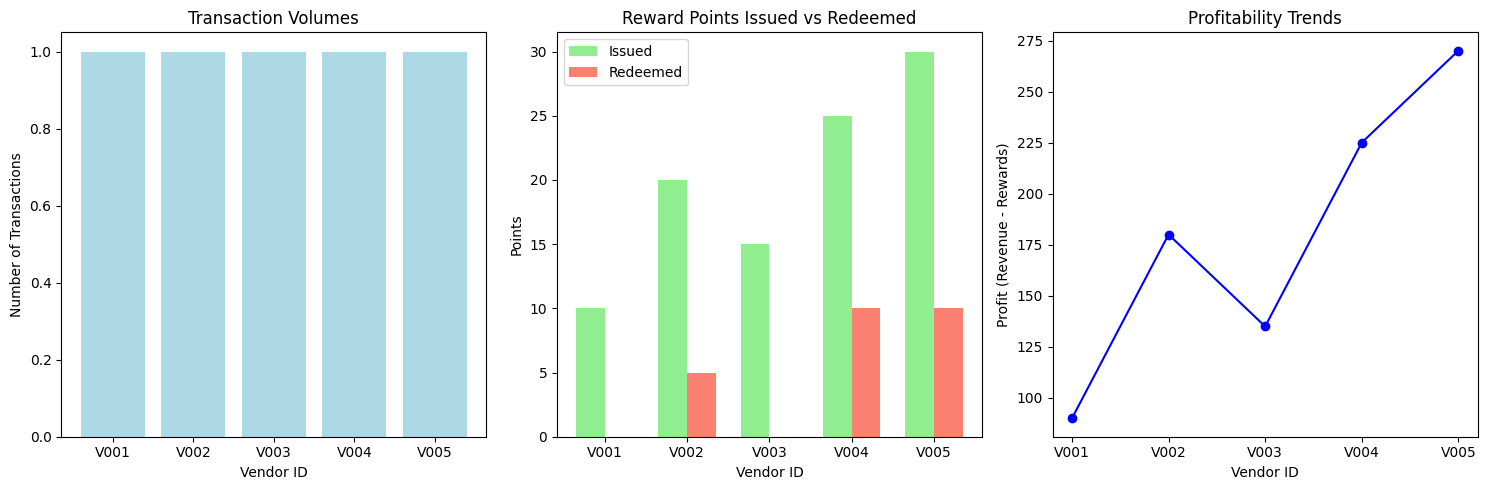

In [22]:
real_time_dashboard()

In [23]:
# Close the database connection
conn.close()